In [3]:
#messing around with the bagpipes output of the JADES catalogue
#deducing correlations between star formation rate ratios and other properties

from astropy.io import fits
from astropy.table import Table
from astropy.table import join
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Load the file
hdulist = fits.open("JADES-DR3-GS_MASTER_Sel-F277W+F356W+F444W_v13.fits")
table_bagpipes = Table(hdulist[1].data)
hdulist.close()
print(table_bagpipes.colnames)

# Extract current star formation rate (median value)
sfr = table_bagpipes['sfr_50']

# # --- Plot 2: SFR vs Stellar Mass ---
stellar_mass = table_bagpipes['stellar_mass_50']
redshift = table_bagpipes['redshift_50']

# plt.figure(figsize=(8, 6))
# plt.scatter(stellar_mass, sfr, s=10, alpha=0.7, color='royalblue')
# plt.xlabel("Stellar Mass (M$_\odot$)")
# plt.ylabel("Current SFR (M$_\odot$/yr)")
# plt.title("Current SFR vs Stellar Mass")
# plt.xscale('log')
# plt.yscale('log')
# plt.grid(True, which='both', linestyle='--', alpha=0.6)
# plt.tight_layout()
# #plt.show()

#------------ SFR ratios -------------------
# Extract the SFRs
sfr_10myr = table_bagpipes['sfr_10myr_50']
sfr_100myr = table_bagpipes['sfr_50']
ssfr = table_bagpipes['ssfr_50']


# Avoid division by zero
valid = sfr_100myr > 0 & (ssfr > 0)

# Compute ratio
sfr_ratio = np.full_like(sfr_10myr, np.nan)  # Fill with NaNs by default
sfr_ratio[valid] = sfr_10myr[valid] / sfr_100myr[valid]
table_bagpipes["sfr_ratio"] = sfr_ratio[valid]
mask = (sfr_ratio < 2) & np.isfinite(sfr_ratio)




# # --- Plot: Histogram of SFR(10 Myr) / SFR(100 Myr) ---
# plt.figure(figsize=(8, 5))
# plt.hist(sfr_ratio[~np.isnan(sfr_ratio)], bins=30, color='tomato', edgecolor='black')
# plt.xlabel("SFR$_{10\,\mathrm{Myr}}$ / SFR$_{100\,\mathrm{Myr}}$")
# plt.ylabel("Number of Galaxies")
# plt.title("Ratio of Recent to Average SFR")
# plt.grid(True, linestyle='--', alpha=0.6)
# plt.tight_layout()
# #plt.show()

# plt.figure(figsize=(8,6))  # create a new figure, optional but good for clarity
# plt.scatter(table_bagpipes["stellar_mass_50"][mask], sfr_ratio[mask], alpha=0.5)
# plt.xlabel("Stellar Mass [M☉]")
# plt.ylabel(r"SFR$_{10\,\mathrm{Myr}}$/SFR$_{100\,\mathrm{Myr}}$")
# plt.title("SFR Ratio vs Stellar Mass")
# plt.grid(True)
# plt.tight_layout()  # fits labels better
# plt.show()

# # --- Plot: SFR Ratio vs sSFR ---
# ssfr = table_bagpipes['ssfr_50']

# plt.figure(figsize=(8,6), facecolor='white')
# plt.scatter(ssfr[mask], sfr_ratio[mask], alpha=0.5, color='mediumseagreen')
# plt.xlabel("Specific Star Formation Rate (sSFR) [yr$^{-1}$]")
# plt.ylabel(r"SFR$_{10\,\mathrm{Myr}}$/SFR$_{100\,\mathrm{Myr}}$")
# plt.title("SFR Ratio vs Specific Star Formation Rate")
# plt.grid(True)
# plt.tight_layout()
# plt.show()

# #--- Plot: sSFR vs Redshift ---

# plt.figure(figsize=(8,6), facecolor='white')
# plt.scatter(redshift[mask], ssfr[mask], alpha=0.5, color='mediumseagreen')
# plt.xlabel("Redshift")
# plt.ylabel("Specific Star Formation Rate (sSFR) [yr$^{-1}$]")
# plt.title("sSFR vs Redshift")
# plt.grid(True)
# plt.tight_layout()
# plt.show()





 


['#ID', 'continuity:dsfr1_16', 'continuity:dsfr1_50', 'continuity:dsfr1_84', 'continuity:dsfr2_16', 'continuity:dsfr2_50', 'continuity:dsfr2_84', 'continuity:dsfr3_16', 'continuity:dsfr3_50', 'continuity:dsfr3_84', 'continuity:dsfr4_16', 'continuity:dsfr4_50', 'continuity:dsfr4_84', 'continuity:dsfr5_16', 'continuity:dsfr5_50', 'continuity:dsfr5_84', 'continuity:massformed_16', 'continuity:massformed_50', 'continuity:massformed_84', 'continuity:metallicity_16', 'continuity:metallicity_50', 'continuity:metallicity_84', 'dust:Av_16', 'dust:Av_50', 'dust:Av_84', 'nebular:logU_16', 'nebular:logU_50', 'nebular:logU_84', 'redshift_16', 'redshift_50', 'redshift_84', 'stellar_mass_16', 'stellar_mass_50', 'stellar_mass_84', 'formed_mass_16', 'formed_mass_50', 'formed_mass_84', 'sfr_16', 'sfr_50', 'sfr_84', 'ssfr_16', 'ssfr_50', 'ssfr_84', 'nsfr_16', 'nsfr_50', 'nsfr_84', 'sfr_10myr_16', 'sfr_10myr_50', 'sfr_10myr_84', 'ssfr_10myr_16', 'ssfr_10myr_50', 'ssfr_10myr_84', 'nsfr_10myr_16', 'nsfr_10m

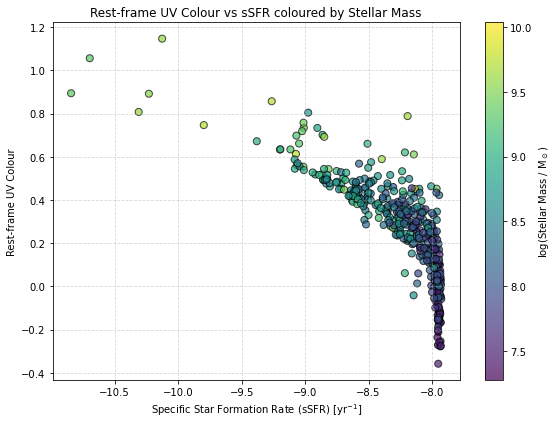

In [4]:
#Plot: Rest-frame UV Colour vs Specific Star Formation Rate


# Assuming you already have these arrays from your table:
uv_colour = table_bagpipes['UV_colour_50']      # Rest-frame UV colour median
ssfr = table_bagpipes['ssfr_50']                # Specific star formation rate median
stellar_mass = table_bagpipes['stellar_mass_50'] # Stellar mass median

# Mask to remove NaNs or invalid values
mask = (~np.isnan(uv_colour)) & (~np.isnan(ssfr)) & (~np.isnan(stellar_mass))  & (sfr_ratio < 2) & np.isfinite(sfr_ratio)


plt.figure(figsize=(8,6), facecolor='white')

sc = plt.scatter(
    ssfr[mask], uv_colour[mask],
    c=(stellar_mass[mask]),  # colour-code by log stellar mass
    cmap='viridis',                  # colormap choice
    alpha=0.7,
    edgecolor='k',
    s=50
)

plt.colorbar(sc, label='log(Stellar Mass / M$_\odot$)')
plt.xlabel("Specific Star Formation Rate (sSFR) [yr$^{-1}$]")
plt.ylabel("Rest-frame UV Colour")
plt.title("Rest-frame UV Colour vs sSFR coloured by Stellar Mass")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


#would be good to redshift colour code, but not for this plot as redshift range is too narrow


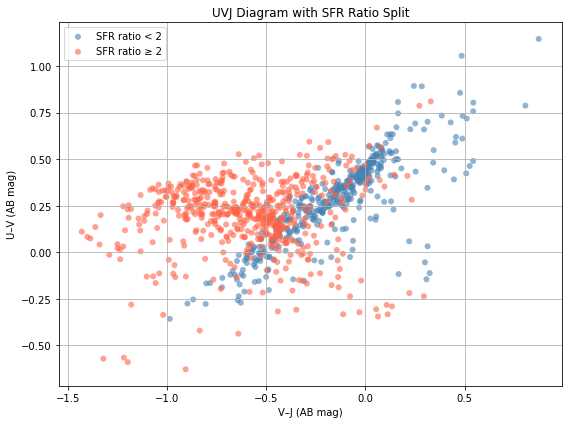

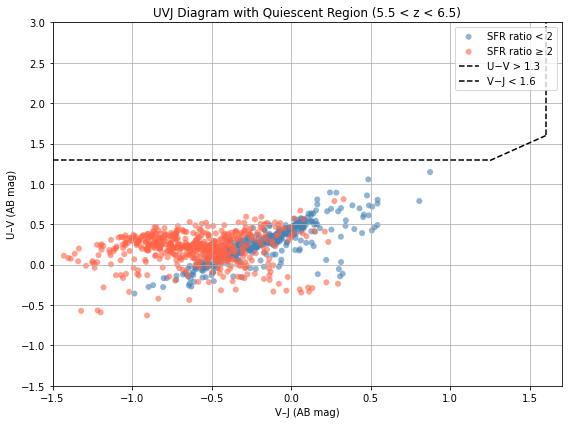

In [5]:
import numpy as np
import matplotlib.pyplot as plt

uv = table_bagpipes["UV_colour_50"]
vj = table_bagpipes["VJ_colour_50"]

# Masks for the two groups
mask_low_sfr = np.isfinite(uv) & np.isfinite(vj) & (sfr_ratio < 2) & np.isfinite(sfr_ratio)
mask_high_sfr = np.isfinite(uv) & np.isfinite(vj) & (sfr_ratio >= 2) & np.isfinite(sfr_ratio)

plt.figure(figsize=(8, 6))

# Plot galaxies with sfr_ratio < 2
plt.scatter(vj[mask_low_sfr], uv[mask_low_sfr], color='steelblue', alpha=0.6, edgecolor='none', label='SFR ratio < 2')

# Plot galaxies with sfr_ratio >= 2
plt.scatter(vj[mask_high_sfr], uv[mask_high_sfr], color='tomato', alpha=0.6, edgecolor='none', label='SFR ratio ≥ 2')

plt.xlabel("V–J (AB mag)")
plt.ylabel("U–V (AB mag)")
plt.title("UVJ Diagram with SFR Ratio Split")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#---------trying to add those lines!

uv = table_bagpipes["UV_colour_50"]
vj = table_bagpipes["VJ_colour_50"]

mask_low_sfr = np.isfinite(uv) & np.isfinite(vj) & (sfr_ratio < 2) & np.isfinite(sfr_ratio)
mask_high_sfr = np.isfinite(uv) & np.isfinite(vj) & (sfr_ratio >= 2) & np.isfinite(sfr_ratio)

plt.figure(figsize=(8, 6), facecolor = 'white')

# Plot galaxies
plt.scatter(vj[mask_low_sfr], uv[mask_low_sfr], color='steelblue', alpha=0.6, label='SFR ratio < 2', edgecolor='none')
plt.scatter(vj[mask_high_sfr], uv[mask_high_sfr], color='tomato', alpha=0.6, label='SFR ratio ≥ 2', edgecolor='none')

# Define V-J range for the sloped line
vj_line = np.linspace(1.25, 1.6, 100)
uv_line = 0.88 * vj_line + 0.19

# Plot the sloped boundary
plt.plot(vj_line, uv_line, 'k--')

# Plot horizontal line U-V = 1.3 (for V-J < 1.6)
plt.hlines(1.3, xmin=-1.5, xmax=1.25, colors='k', linestyles='--', label='U−V > 1.3')

# Plot vertical line V-J = 1.6 (for U-V > 1.3)
plt.vlines(1.6, ymin=1.6, ymax=3, colors='k', linestyles='--', label='V−J < 1.6')

# Set plot limits to focus on relevant region
plt.xlim(-1.5, 1.7)
plt.ylim(-1.5, 3)

plt.xlabel("V–J (AB mag)")
plt.ylabel("U–V (AB mag)")
plt.title("UVJ Diagram with Quiescent Region (5.5 < z < 6.5)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




This section is just for looking at what columns tables have, to see if they have any bagpipes outputs


In [6]:
#messing around with the bagpipes output of the JADES catalogue
#deducing correlations between star formation rate ratios and other properties

from astropy.io import fits
from astropy.table import Table
from astropy.table import join
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Load the file
field = 'CEERS'
file = 'CEERS_MASTER_Sel-F277W+F356W+F444W_v9.fits'
hdulist = fits.open("/raid/scratch/work/parkera/ACS_WFC+NIRCam/v11/COSMOS-Web-0A/COSMOS-Web-0A_MASTER_Sel-F444W_v11_0.32as_EAZY_fsps_larson_zmax=6.0.fits")
table_bagpipes = Table(hdulist[1].data)
hdulist.close()
print(table_bagpipes.colnames)

['IDENT', 'zbest_fsps_larson_zmax=6.0', 'zbest_16_fsps_larson_zmax=6.0', 'zbest_84_fsps_larson_zmax=6.0', 'chi2_best_fsps_larson_zmax=6.0', 'U_rf_flux_fsps_larson_zmax=6.0', 'U_rf_flux_err_fsps_larson_zmax=6.0', 'B_rf_flux_fsps_larson_zmax=6.0', 'B_rf_flux_err_fsps_larson_zmax=6.0', 'V_rf_flux_fsps_larson_zmax=6.0', 'V_rf_flux_err_fsps_larson_zmax=6.0', 'J_rf_flux_fsps_larson_zmax=6.0', 'J_rf_flux_err_fsps_larson_zmax=6.0']


## This section is using my mini catalogues i make and plotting figures of those!

['#ID', 'dust:Av_16', 'dust:Av_50', 'dust:Av_84', 'exponential:age_16', 'exponential:age_50', 'exponential:age_84', 'exponential:massformed_16', 'exponential:massformed_50', 'exponential:massformed_84', 'exponential:metallicity_16', 'exponential:metallicity_50', 'exponential:metallicity_84', 'exponential:tau_16', 'exponential:tau_50', 'exponential:tau_84', 'redshift_16', 'redshift_50', 'redshift_84', 'stellar_mass_16', 'stellar_mass_50', 'stellar_mass_84', 'formed_mass_16', 'formed_mass_50', 'formed_mass_84', 'sfr_16', 'sfr_50', 'sfr_84', 'ssfr_16', 'ssfr_50', 'ssfr_84', 'nsfr_16', 'nsfr_50', 'nsfr_84', 'sfr_10myr_16', 'sfr_10myr_50', 'sfr_10myr_84', 'ssfr_10myr_16', 'ssfr_10myr_50', 'ssfr_10myr_84', 'nsfr_10myr_16', 'nsfr_10myr_50', 'nsfr_10myr_84', 'burstiness_16', 'burstiness_50', 'burstiness_84', 'mass_weighted_age_16', 'mass_weighted_age_50', 'mass_weighted_age_84', 'tform_16', 'tform_50', 'tform_84', 'tquench_16', 'tquench_50', 'tquench_84', 'mass_weighted_zmet_16', 'mass_weighte

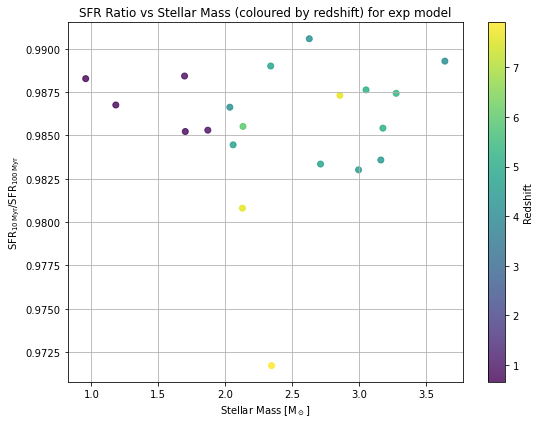

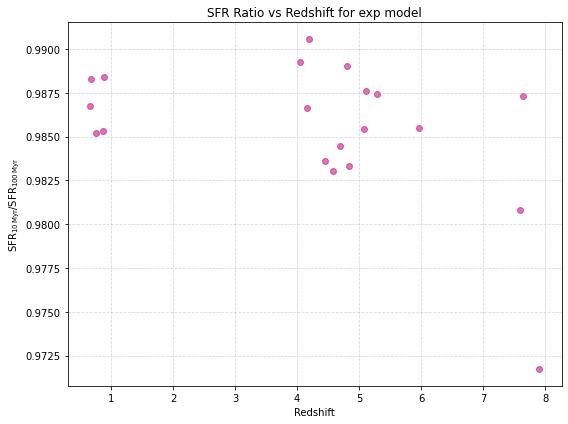

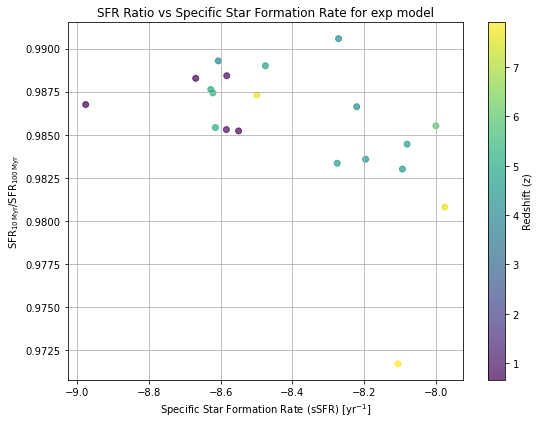

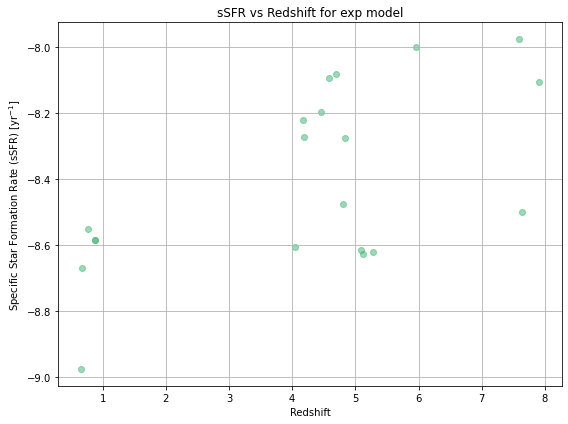

In [21]:
#messing around with the bagpipes output of the JADES catalogue
#deducing correlations between star formation rate ratios and other properties
#trying on my mini cat!

from astropy.io import fits
from astropy.table import Table
from astropy.table import join
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Load the file
mini_table_bagpipes = Table.read("pipes/cats/mini_cat_20_gals.fits")

hdulist.close()
print(mini_table_bagpipes.colnames)

# Extract current star formation rate (median value)
sfr = mini_table_bagpipes['sfr_50']

# --- Plot 2: SFR vs Stellar Mass ---
stellar_mass = mini_table_bagpipes['stellar_mass_50']

# plt.figure(figsize=(8, 6))
# plt.scatter(stellar_mass, sfr, s=10, alpha=0.7, color='royalblue')
# plt.xlabel("Stellar Mass (M$_\odot$)")
# plt.ylabel("Current SFR (M$_\odot$/yr)")
# plt.title("Current SFR vs Stellar Mass")
# plt.xscale('log')
# plt.yscale('log')
# plt.grid(True, which='both', linestyle='--', alpha=0.6)
# plt.tight_layout()
# #plt.show()

#------------ SFR ratios -------------------
# Extract the SFRs
sfr_10myr = mini_table_bagpipes['sfr_10myr_50']
sfr_100myr = mini_table_bagpipes['sfr_50']

# Avoid division by zero
valid = sfr_100myr > 0

# Compute ratio
sfr_ratio = np.full_like(sfr_10myr, np.nan)  # Fill with NaNs by default
sfr_ratio[valid] = sfr_10myr[valid] / sfr_100myr[valid]
mini_table_bagpipes["sfr_ratio"] = sfr_ratio[valid]
redshift = mini_table_bagpipes['redshift_50']


# # --- Plot: Histogram of SFR(10 Myr) / SFR(100 Myr) ---
# plt.figure(figsize=(8, 5))
# plt.hist(sfr_ratio[~np.isnan(sfr_ratio)], bins=30, color='tomato', edgecolor='black')
# plt.xlabel("SFR$_{10\,\mathrm{Myr}}$ / SFR$_{100\,\mathrm{Myr}}$")
# plt.ylabel("Number of Galaxies")
# plt.title("Ratio of Recent to Average SFR")
# plt.grid(True, linestyle='--', alpha=0.6)
# plt.tight_layout()
# #plt.show()

plt.figure(figsize=(8, 6), facecolor='white')  

# Scatter plot with redshift colour coding
sc = plt.scatter(mini_table_bagpipes["stellar_mass_50"], sfr_ratio,  c=redshift, cmap='viridis', alpha=0.8)
plt.xlabel("Stellar Mass [M$_\odot$]")
plt.ylabel(r"SFR$_{10\,\mathrm{Myr}}$/SFR$_{100\,\mathrm{Myr}}$")
plt.title("SFR Ratio vs Stellar Mass (coloured by redshift) for exp model")
plt.grid(True)
plt.tight_layout()
cbar = plt.colorbar(sc)
cbar.set_label("Redshift")
plt.show()

## --- Plot: SFR Ratio vs Redshift ---
plt.figure(figsize=(8,6), facecolor='white')
plt.scatter(mini_table_bagpipes["redshift_50"], sfr_ratio, alpha=0.6, c="mediumvioletred")
plt.xlabel("Redshift")
plt.ylabel(r"SFR$_{10\,\mathrm{Myr}}$/SFR$_{100\,\mathrm{Myr}}$")
plt.title("SFR Ratio vs Redshift for exp model")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# #§# --- Plot: SFR Ratio vs Quenching Time ---
# plt.figure(figsize=(8,6))
# plt.scatter(table_bagpipes["tquench_50"], sfr_ratio, alpha=0.6, c="teal")
# plt.xlabel("Quenching Time [Gyr]")
# plt.ylabel(r"SFR$_{10\,\mathrm{Myr}}$/SFR$_{100\,\mathrm{Myr}}$")
# plt.title("SFR Ratio vs Quenching Time")
# plt.grid(True, linestyle='--', alpha=0.5)
# plt.tight_layout()
# plt.show()

# # --- Plot: SFR Ratio vs Dust Attenuation ---
# plt.figure(figsize=(8,6))
# plt.scatter(table_bagpipes["dust:Av_50"], sfr_ratio, alpha=0.6, c="darkorange")
# plt.xlabel("Dust Attenuation A$_V$")
# plt.ylabel(r"SFR$_{10\,\mathrm{Myr}}$/SFR$_{100\,\mathrm{Myr}}$")
# plt.title("SFR Ratio vs Dust Attenuation")
# plt.grid(True, linestyle='--', alpha=0.5)
# plt.tight_layout()
# plt.show()

# --- Plot: SFR Ratio vs sSFR ---
ssfr = mini_table_bagpipes['ssfr_50']

plt.figure(figsize=(8,6), facecolor='white')
sc = plt.scatter(ssfr[valid], sfr_ratio[valid],c=redshift[valid], cmap='viridis', alpha=0.7)
plt.xlabel("Specific Star Formation Rate (sSFR) [yr$^{-1}$]")
plt.ylabel(r"SFR$_{10\,\mathrm{Myr}}$/SFR$_{100\,\mathrm{Myr}}$")
plt.title("SFR Ratio vs Specific Star Formation Rate for exp model")
plt.grid(True)
cbar = plt.colorbar(sc)
cbar.set_label("Redshift (z)")
plt.tight_layout()
plt.show()

#--- Plot: sSFR vs Redshift ---

plt.figure(figsize=(8,6), facecolor='white')
plt.scatter(redshift[valid], ssfr[valid], alpha=0.5, color='mediumseagreen')
plt.xlabel("Redshift")
plt.ylabel("Specific Star Formation Rate (sSFR) [yr$^{-1}$]")
plt.title("sSFR vs Redshift for exp model")
plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:
#---------trying to add those lines!

uv = mini_table_bagpipes["UV_colour_50"]
vj = mini_table_bagpipes["VJ_colour_50"]

mask_low_sfr = np.isfinite(uv) & np.isfinite(vj) & (sfr_ratio < 2) & np.isfinite(sfr_ratio)
mask_high_sfr = np.isfinite(uv) & np.isfinite(vj) & (sfr_ratio >= 2) & np.isfinite(sfr_ratio)

plt.figure(figsize=(8, 6), facecolor = 'white')

# Plot galaxies
plt.scatter(vj[mask_low_sfr], uv[mask_low_sfr], color='steelblue', alpha=0.6, label='SFR ratio < 2', edgecolor='none')
plt.scatter(vj[mask_high_sfr], uv[mask_high_sfr], color='tomato', alpha=0.6, label='SFR ratio ≥ 2', edgecolor='none')

# Define V-J range for the sloped line
vj_line = np.linspace(1.25, 1.6, 100)
uv_line = 0.88 * vj_line + 0.19

# Plot the sloped boundary
plt.plot(vj_line, uv_line, 'k--')

# Plot horizontal line U-V = 1.3 (for V-J < 1.6)
plt.hlines(1.3, xmin=-1.5, xmax=1.25, colors='k', linestyles='--', label='U−V > 1.3')

# Plot vertical line V-J = 1.6 (for U-V > 1.3)
plt.vlines(1.6, ymin=1.6, ymax=3, colors='k', linestyles='--', label='V−J < 1.6')

# Set plot limits to focus on relevant region
plt.xlim(-1.5, 1.7)
plt.ylim(-1.5, 3)

plt.xlabel("V–J (AB mag)")
plt.ylabel("U–V (AB mag)")
plt.title("UVJ Diagram with Quiescent Region (5.5 < z < 6.5)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



KeyError: 'UV_colour_50'